<a href="https://colab.research.google.com/github/BengiNouri/ML2/blob/main/ML4BI_E3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning for BI 2

## Deep Learning exercises for week 3

In this exercise, you'll practice on the examples we went through during the lectures.

Try one or more!

1. You used two representation layers before the final classification layer. Try using one or three representation layers, and see how doing so affects validation and test accuracy

2. Try using layers with more units or fewer units: 32 units, 64 units, and so on.

**Loading the IMDB dataset**

In [1]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)


17464789/17464789 [==============================] - 2s 0us/step


**Encoding the integer sequences via multi-hot encoding**

In [2]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [3]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

### Building your model

In [4]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
layers.Dense(16, activation="relu"),
layers.Dense(16, activation="relu"),
layers.Dense(1, activation="sigmoid")
])

In [5]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [6]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [7]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=0)

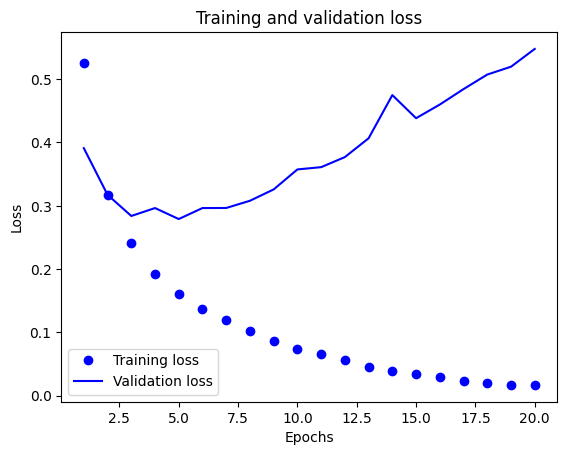

In [8]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

## Newswire

### Information bottleneck

Try creating an information bottleneck in your architecture. For example, you can this by using 64 neurons in the first layer and 4 neurons in the second.

Try different types of configurations and see how the validation loss or accuracy curve is affected. Write a function that allows to change the number of neurons in each layer and then make a joint plot of all the curves afterwards.

I have copied in the data loading and labels encoding steps from the course notebook to help you get started.

**Loading the Reuters dataset**

In [9]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

2110848/2110848 [==============================] - 0s 0us/step


**Decoding newswires back to text**

In [10]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

**Encoding the labels**

In [11]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [13]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

**Setting aside a validation set**

In [18]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

### Building your model

In [19]:
##YOUR C
model = keras.Sequential([
layers.Dense(64, activation="relu"),
layers.Dense(64, activation="relu"),
layers.Dense(46, activation="softmax")
])

In [22]:
model.compile(optimizer="rmsprop",
loss="categorical_crossentropy",
metrics=["accuracy"])

In [23]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [24]:
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 56ms/step - loss: 2.7235 - accuracy: 0.5008 - val_loss: 1.8173 - val_accuracy: 0.6240
Epoch 2/20
16/16 [==============================] - 0s 26ms/step - loss: 1.5081 - accuracy: 0.6874 - val_loss: 1.3562 - val_accuracy: 0.6900
Epoch 3/20
16/16 [==============================] - 0s 30ms/step - loss: 1.1461 - accuracy: 0.7497 - val_loss: 1.1829 - val_accuracy: 0.7270
Epoch 4/20
16/16 [==============================] - 0s 27ms/step - loss: 0.9367 - accuracy: 0.7998 - val_loss: 1.0901 - val_accuracy: 0.7580
Epoch 5/20
16/16 [==============================] - 0s 29ms/step - loss: 0.7807 - accuracy: 0.8261 - val_loss: 0.9936 - val_accuracy: 0.7880
Epoch 6/20
16/16 [==============================] - 0s 28ms/step - loss: 0.6529 - accuracy: 0.8574 - val_loss: 0.9486 - val_accuracy: 0.8070
Epoch 7/20
16/16 [==============================] - 0s 29ms/step - loss: 0.5462 - accuracy: 0.8811 - val_loss: 0.9173 - val_accuracy: 0.8090
Epoch 8/20
16

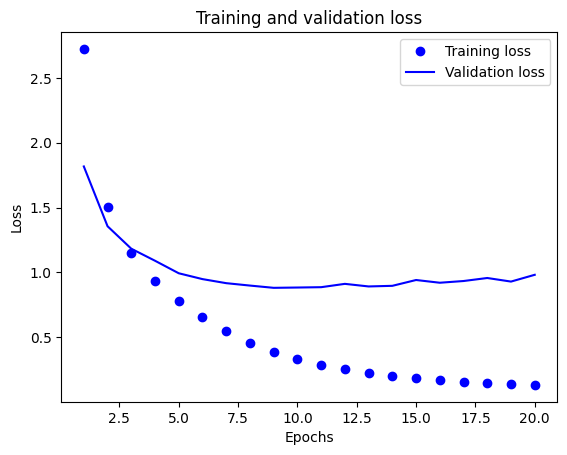

In [25]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

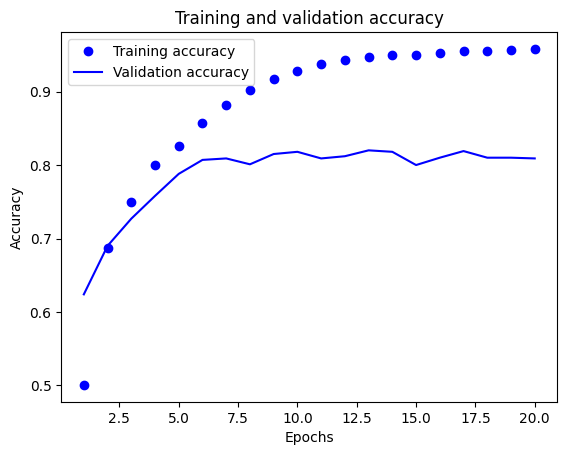

In [26]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [27]:
model = keras.Sequential([
layers.Dense(64, activation="relu"),
layers.Dense(64, activation="relu"),
layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
loss="categorical_crossentropy",
metrics=["accuracy"])
model.fit(x_train,
y_train,
epochs=9,
batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/9
18/18 [==============================] - 2s 23ms/step - loss: 2.6632 - accuracy: 0.5218
Epoch 2/9
18/18 [==============================] - 0s 25ms/step - loss: 1.4725 - accuracy: 0.6872
Epoch 3/9
18/18 [==============================] - 1s 31ms/step - loss: 1.1185 - accuracy: 0.7542
Epoch 4/9
18/18 [==============================] - 0s 24ms/step - loss: 0.9048 - accuracy: 0.8007
Epoch 5/9
18/18 [==============================] - 0s 22ms/step - loss: 0.7393 - accuracy: 0.8377
Epoch 6/9
18/18 [==============================] - 0s 22ms/step - loss: 0.6142 - accuracy: 0.8662
Epoch 7/9
18/18 [==============================] - 0s 22ms/step - loss: 0.5151 - accuracy: 0.8909
Epoch 8/9
18/18 [==============================] - 0s 22ms/step - loss: 0.4277 - accuracy: 0.9094
Epoch 9/9
71/71 [==============================] - 1s 4ms/step - loss: 0.9422 - accuracy: 0.7907


In [28]:
>>> import copy
>>> test_labels_copy = copy.copy(test_labels)
>>> np.random.shuffle(test_labels_copy)
>>> hits_array = np.array(test_labels) == np.array(test_labels_copy)
>>> hits_array.mean()

0.19946571682991987

In [29]:
predicitions = model.predict(x_test) # returns a 2D tensor

71/71 [==============================] - 0s 4ms/step


In [30]:
predicitions[0].shape
# each entry in predictions is a vector of length 46

(46,)

In [31]:
np.sum(predicitions[0]) # the coefficients in this vector sum to 1

1.0

In [32]:
np.argmax(predicitions[0]) # the largest entry is the predicted class   

4

In [33]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [34]:
model.compile(optimizer="rmsprop",
loss="sparse_categorical_crossentropy",
metrics=["accuracy"])

In [35]:
model = keras.Sequential([
layers.Dense(64, activation="relu"),
layers.Dense(4, activation="relu"),
layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
loss="categorical_crossentropy",
metrics=["accuracy"])
model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=128,
validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 4s 33ms/step - loss: 3.2629 - accuracy: 0.0852 - val_loss: 2.6384 - val_accuracy: 0.3130
Epoch 2/20
63/63 [==============================] - 1s 14ms/step - loss: 2.0634 - accuracy: 0.5829 - val_loss: 1.6618 - val_accuracy: 0.6130
Epoch 3/20
63/63 [==============================] - 1s 14ms/step - loss: 1.4444 - accuracy: 0.6510 - val_loss: 1.3959 - val_accuracy: 0.6630
Epoch 4/20
63/63 [==============================] - 1s 17ms/step - loss: 1.2139 - accuracy: 0.7111 - val_loss: 1.2972 - val_accuracy: 0.7000
Epoch 5/20
63/63 [==============================] - 1s 14ms/step - loss: 1.0751 - accuracy: 0.7572 - val_loss: 1.2510 - val_accuracy: 0.7120
Epoch 6/20
63/63 [==============================] - 1s 15ms/step - loss: 0.9775 - accuracy: 0.7701 - val_loss: 1.2121 - val_accuracy: 0.7160
Epoch 7/20
63/63 [==============================] - 1s 14ms/step - loss: 0.9012 - accuracy: 0.7805 - val_loss: 1.2019 - val_accuracy: 0.7210
Epoch 8/20
63